In [37]:
import snap
import numpy as np
import pandas as pd
import wget
import os
import gzip
from graphviz import Graph
from graphviz import Source
import matplotlib.pyplot as plt

In [2]:
def gz_data_loader(data_url):
    file_to_load = wget.download(data_url)
    filename = os.path.splitext(os.path.basename(data_url))[0]
    os.replace(file_to_load, os.path.join('input', file_to_load))

    with gzip.open(os.path.join('input', file_to_load), 'rb') as f:
        f_in = f.read()
        with open(os.path.join('input', filename), 'wb') as f_out:
            f_out.write(f_in)
            print('\n{} loaded and unpacked'.format(os.path.basename(data_url)))

1 Analyzing the Wikipedia voters network [27 points]

Download the Wikipedia voting network wiki-Vote.txt.gz: [ссылка](http://snap.stanford.edu/data/wiki-Vote.html)

![images/001.png](images/001.png)

![images/002.png](images/002.png)

2 Further Analyzing the Wikipedia voters network [33 points]

For this problem, we use the Wikipedia voters network. If you are using Python, you might
want to use NumPy, SciPy, and/or Matplotlib libraries.

![images/003.png](images/003.png)

3 Finding Experts on the Java Programming Language on StackOverow [40 points]

Download the StackOverow network stackoverflow-Java.txt.gz: [ссылка](http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz). An edge (a, b) in the network
means that person a endorsed an answer from person b on a Java-related question.

![images/004.png](images/004.png)

![images/005.png](images/005.png)

You can find more details about this exercise on the Snap.py tutorial page: [тут](http://snap.stanford.edu/proj/snap-icwsm/). As an extra exercise, extend the tutorial to find experts in other program-
ming languages or topics.

# Analyzing the Wikipedia voters network

- [x] The number of nodes in the network.
- [x] The number of nodes with a self-edge (self-loop)
- [x] The number of directed edges in the network
- [x] The number of undirected edges in the network
- [x] The number of reciprocated edges in the network
- [x] The number of nodes of zero out-degree
- [x] The number of nodes of zero in-degree
- [x] The number of nodes with more than 10 outgoing edges (out-degree > 10)
- [x] The number of nodes with fewer than 10 incoming edges (in-degree < 10)

In [3]:
gz_data_loader('http://snap.stanford.edu/data/wiki-Vote.txt.gz')

100% [............................................................................] 290339 / 290339
wiki-Vote.txt.gz loaded and unpacked


In [4]:
G_wiki_vote = snap.LoadEdgeList(snap.PNGraph, "input/wiki-Vote.txt", 0, 1)

In [5]:
snap.PrintInfo(G_wiki_vote, "Standart statistcs")

In [6]:
# The number of nodes in the network (with degree greater than 0)
snap.CntNonZNodes(G_wiki_vote)

7115

In [7]:
# by iteratuon
node_summary = 0
for node in G_wiki_vote.Nodes():
    node_summary += 1
print(node_summary)

7115


In [8]:
# The number of nodes with a self-edge (self-loop)
snap.CntSelfEdges(G_wiki_vote)

0

In [9]:
# The number of directed edges in the network (unic!!!)
snap.CntUniqDirEdges(G_wiki_vote)

103689

In [10]:
# The number of undirected edges in the network (unic!!!)
snap.CntUniqUndirEdges(G_wiki_vote)

100762

In [11]:
# The number of reciprocated edges in the network (unic bidirectinal!!!)
snap.CntUniqBiDirEdges(G_wiki_vote)

2927

In [12]:
# The number of nodes of zero out-degree
snap.CntOutDegNodes(G_wiki_vote, 0)

1005

In [13]:
# The number of nodes of zero in-degree
snap.CntInDegNodes(G_wiki_vote, 0)

4734

In [14]:
# The number of nodes with more than 10 outgoing edges (out-degree > 10)
# The number of nodes with fewer than 10 incoming edges (in-degree < 10)
node_more_10_out = 0
node_less_10_in = 0
for node in G_wiki_vote.Nodes():
    if node.GetOutDeg() > 10:
        node_more_10_out += 1
    elif node.GetInDeg() < 10:
        node_less_10_in += 1
print('Out-degree > 10 has {} nodes, in-degree < 10 has {} nodes'.format(node_more_10_out, node_less_10_in))

Out-degree > 10 has 1612 nodes, in-degree < 10 has 4346 nodes


# Further Analyzing the Wikipedia voters network

- [x] Plot the distribution of out-degrees of nodes in the network on a log-log scale
- [x] Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot

In [27]:
# name of output cant contain path
snap.PlotOutDegDistr(G_wiki_vote, 
                     "wiki-Vote-distribution-of-out-degrees", 
                     "The distribution of out-degrees of nodes in the network for a log-log scale visualisation")

In [48]:
with open("outDeg.wiki-Vote-distribution-of-out-degrees.tab") as tabed:
    to_pd = pd.read_table(tabed, skiprows=[0,1,2])

In [96]:
to_pd

,# Out-degree,Count
0,0,1005
1,1,2382
2,2,704
3,3,401
4,4,279
5,5,162
6,6,159
7,7,131
8,8,110
9,9,91


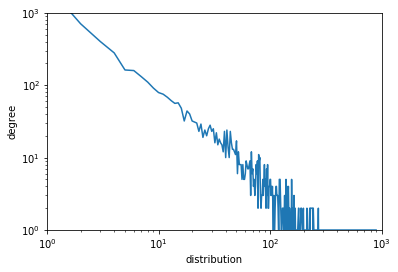

In [114]:
fig, ax = plt.subplots()
ax.axis([1, 1005, 1, 1005])
ax.loglog()
plt.ylabel('degree')
plt.xlabel('distribution')
plt.plot(to_pd['# Out-degree'], to_pd['Count'])
plt.show()

In [181]:
poly_coef = np.polyfit(to_pd['# Out-degree'], to_pd['Count'], 1)
poly_id = np.poly1d(poly_coef)
poly_id

poly1d([-0.215841  , 63.04287515])

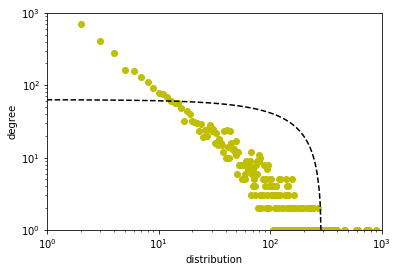

In [187]:
fig, ax = plt.subplots()
ax.axis([1, 1005, 1, 1005])
ax.loglog()
plt.ylabel('degree')
plt.xlabel('distribution')
plt.plot(to_pd['# Out-degree'], to_pd['Count'], 'yo', 
         to_pd['# Out-degree'], poly_id(to_pd['# Out-degree']), '--k')
plt.show()

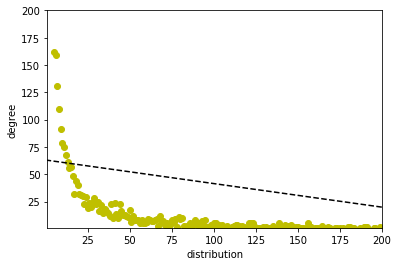

In [186]:
fig, ax = plt.subplots()
ax.axis([1, 200, 1, 200])
# ax.loglog()
plt.ylabel('degree')
plt.xlabel('distribution')
plt.plot(to_pd['# Out-degree'], to_pd['Count'], 'yo', 
         to_pd['# Out-degree'], poly_id(to_pd['# Out-degree']), '--k')
plt.show()

In [21]:
snap.DrawGViz(G_wiki_vote, snap.gvlNeato, "images/wiki-Vote-graph.png", "wiki-Vote-graph", True)

![images/wiki-Vote-graph.png](images/wiki-Vote-graph.png)

In [24]:
# this method provoke out of memory result

# s = Source.from_file('images/wiki-Vote-graph.dot')
# s.view()

# Finding Experts on the Java Programming Language on StackOverow

In [15]:
gz_data_loader('http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz')

100% [..........................................................................] 2144812 / 2144812
stackoverflow-Java.txt.gz loaded and unpacked


- [x] The number of weakly connected components in the network
- [x] The number of edges and the number of nodes in the largest weakly connected component
- [x] IDs of the top 3 most central nodes in the network by PagePank scores
- [x] IDs of the top 3 hubs and top 3 authorities in the network by HITS scores

In [16]:
G_stackoverflow_Java = snap.LoadEdgeList(snap.PNGraph, "input/stackoverflow-Java.txt", 0, 1)

In [17]:
# The number of weakly connected components in the network
weakly = snap.TCnComV()
snap.GetWccs(G_stackoverflow_Java, weakly)
weakly_count = 0
for count in weakly:
    weakly_count += 1
print(weakly_count)

10143


In [18]:
# The number of edges and the number of nodes in the largest weakly connected component

G_stackoverflow_Java_largest = snap.GetMxWcc(G_stackoverflow_Java)
nodes_l = snap.CntNonZNodes(G_stackoverflow_Java_largest)
edges_l = snap.CntUniqBiDirEdges(G_stackoverflow_Java_largest)
print('{0} numbers of nodes and {1} numbers of edges in largest weakly connected component'.format(nodes_l, edges_l))

131188 numbers of nodes and 115 numbers of edges in largest weakly connected component


In [19]:
# IDs of the top 3 most central nodes in the network by PagePank scores
pagerank = snap.TIntFltH()
snap.GetPageRank(G_stackoverflow_Java, pagerank)
storage = {}
for item in pagerank:
    storage[item] = pagerank[item]
sorted_storage_values_3 = sorted(storage.values())[-3::]
for item in pagerank:
    if pagerank[item] in sorted_storage_values_3:
        print('id {0}, pagerank {1} \n'.format(item, pagerank[item]))

id 22656, pagerank 0.007103532693128619 

id 135152, pagerank 0.010005538895741885 

id 992484, pagerank 0.013980540412209575 



In [20]:
# IDs of the top 3 hubs and top 3 authorities in the network by HITS scores
hubs = snap.TIntFltH()
authorities = snap.TIntFltH()
snap.GetHits(G_stackoverflow_Java, hubs, authorities)
storage_hubs = {}
for item in hubs:
    storage_hubs[item] = hubs[item]
storage_authorities = {}
for item in authorities:
    storage_authorities[item] = authorities[item]
sorted_storage_hubs_values_3 = sorted(storage_hubs.values())[-3::]
sorted_storage_authorities_values_3 = sorted(storage_authorities.values())[-3::]
for item in hubs:
    if hubs[item] in sorted_storage_hubs_values_3:
        print('id {0}, hubs {1} \n'.format(item, hubs[item]))
for item in authorities:
    if authorities[item] in sorted_storage_authorities_values_3:
        print('id {0}, authorities {1} \n'.format(item, authorities[item]))

id 359862, hubs 0.05687564588068672 

id 892029, hubs 0.07336380373389548 

id 1194415, hubs 0.05955074418794487 

id 22656, authorities 0.6047239730413133 

id 157882, authorities 0.2986993488728824 

id 571407, authorities 0.2839071934144654 

